# Notice: Py-Feat ver 0.6.1 ONLY

## check your env is py38feat

In [1]:
!pip list | grep feat
!python --version
!conda env list

py-feat                       0.6.1
Python 3.8.17
# conda environments:
#
base                     /home/dongagent/anaconda3
py37pyfeat1              /home/dongagent/anaconda3/envs/py37pyfeat1
py38featlatest        *  /home/dongagent/anaconda3/envs/py38featlatest
py38pyfeat               /home/dongagent/anaconda3/envs/py38pyfeat
pyfeat_py310             /home/dongagent/anaconda3/envs/pyfeat_py310
pytorch                  /home/dongagent/anaconda3/envs/pytorch



## Function 1 
### input: the folder of your result
### output: order of the images by Py-Feat

In [15]:
import os
import pandas as pd
def checkEmoOrder(folderPath, emo):
    if os.path.exists(folderPath):
        target_emotion = emo
        ls_name = os.listdir(folderPath)
#         print(ls_name)
        result_dic = {}

        for i in ls_name:
            if 'emotion' in i:
                mypath = os.path.join(folderPath, i)
                temp = pd.read_csv(mypath)
                result = temp[target_emotion][0]
                result = round(result, 6)
                fileName = temp['input'][0]
                result_dic[i[:-12] + '.png'] = result
        # sort in value order 
        res_value_order = sorted(result_dic.items(), key=lambda item: item[1], reverse = True)

#         ##### choose top 10
#         res_value_order = res_value_order[:10]
#         print(target_emotion)
#     #     print(len(res_value_order))
#     #     print(len(res_value_order))
#         for i in res_value_order:
#             print(i)
#         print()
        return res_value_order
    else:
        print("folderNameNotExists")
        
# Test

# anger_res = checkEmoOrder('image_analysis/231219Exp16Feat037/anger/', 'anger')

anger_res = checkEmoOrder('image_analysis/anger/', 'anger')
# disgust_res = checkEmoOrder('image_analysis/231218Exp15NewFeat/disgust/', 'disgust')
# fear_res = checkEmoOrder('image_analysis/231218Exp15NewFeat/fear/', 'fear')
# happy_res = checkEmoOrder('image_analysis/231218Exp15NewFeat/happiness/', 'happiness')
# sad_res = checkEmoOrder('image_analysis/231218Exp15NewFeat/sadness/', 'sadness')
# surprise_res = checkEmoOrder('image_analysis/231218Exp15NewFeat/surprise/', 'surprise')

# happy_res = checkEmoOrder('image_analysis/happiness/', 'happiness')

def subll(l):
    return [list(x) for x in l]
print(subll(anger_res[:20]), '\n')
# print(subll(disgust_res[:20]), '\n')
# print(subll(fear_res[:20]), '\n')
# print(subll(happy_res[:30]), '\n')
# print(subll(sad_res[:20]), '\n')
# print(subll(surprise_res[:20]), '\n')
def subl(l):
    return [x[0] for x in l]
print(subl(anger_res[:20]), '\n')
# print(subl(disgust_res[:20]), '\n')
# print(subl(fear_res[:20]), '\n')
# print(subl(happy_res[:30]), '\n')
# print(subl(sad_res[:20]), '\n')
# print(subl(surprise_res[:20]), '\n')


[['2023_12_26_18_25_12_anger_52.png', 0.862433], ['2023_12_26_18_26_28_anger_80.png', 0.857424], ['2023_12_26_18_24_48_anger_43.png', 0.805642], ['2023_12_26_18_26_04_anger_71.png', 0.798721], ['2023_12_26_18_26_16_anger_75.png', 0.795007], ['2023_12_26_18_24_15_anger_31.png', 0.791262], ['2023_12_26_18_25_48_anger_65.png', 0.784982], ['2023_12_26_18_24_23_anger_34.png', 0.770115], ['2023_12_26_18_25_40_anger_62.png', 0.767922], ['2023_12_26_18_26_34_anger_82.png', 0.766423], ['2023_12_26_18_26_19_anger_76.png', 0.764268], ['2023_12_26_18_25_04_anger_49.png', 0.759265], ['2023_12_26_18_26_41_anger_85.png', 0.758718], ['2023_12_26_18_24_45_anger_42.png', 0.75858], ['2023_12_26_18_24_01_anger_26.png', 0.757807], ['2023_12_26_18_25_54_anger_67.png', 0.757733], ['2023_12_26_18_24_37_anger_39.png', 0.742159], ['2023_12_26_18_25_43_anger_63.png', 0.736542], ['2023_12_26_18_24_18_anger_32.png', 0.727793], ['2023_12_26_18_24_58_anger_47.png', 0.722175]] 

['2023_12_26_18_25_12_anger_52.png', '

### Util: show Py-Feat res distribution

In [13]:
import matplotlib.pyplot as plt

def showResDistribution(my_res, title):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    x = range(1, len(my_res) + 1)
    y = [i[1] for i in my_res]
    new_x = []
    new_y = []
    for i, v in enumerate(x):
        if y[i] > 0.8:
            new_x.append(v)
            new_y.append(y[i])
    plt.scatter(new_x, new_y)
    plt.show()

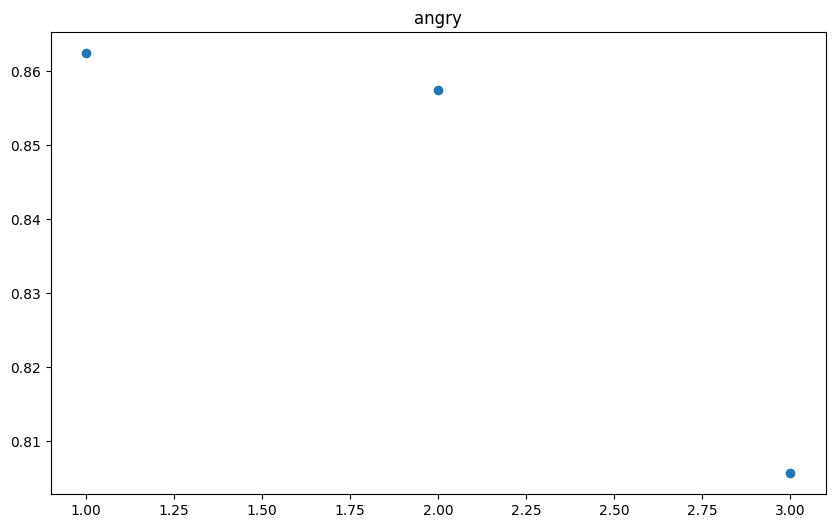

In [14]:
# Anger
showResDistribution(anger_res, 'angry')
# showResDistribution(disgust_res, 'disgust')
# showResDistribution(fear_res, 'fear')
# showResDistribution(happy_res, 'happy')
# showResDistribution(sad_res, 'sad')
# showResDistribution(surprise_res, 'surprise')

In [30]:
from feat import Detector
detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')
res_d = detector.detect_image('image_analysis/anger/2023_12_18_16_29_10_anger_93.png')


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.00s/it]


In [31]:
res_d.au_model

'xgb'

In [32]:
res_d.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,0.294015,0.401234,0.482325,0.340788,0.451529,0.0,0.655109,0.726794,0.477792,0.541492,0.258254,0.12906,0.4044,1.0,0.342711,0.332009,0.999921,0.544249,0.011652,0.631576


In [38]:
res_d.emotions

,anger,disgust,fear,happiness,sadness,surprise,neutral
0,0.595246,0.036316,0.18013,0.00602,0.028303,0.150242,0.003743


## Function 2: show images one by one
### Input: photo name
### Output: images

In [8]:
import glob, os, shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



def showImages(imglist, figsize=(20,10)):
    images = []
    for img_path in imglist:
        images.append(mpimg.imread(img_path))
    plt.figure(figsize=figsize)
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(len(images) // columns + 1, columns, i + 1)
        plt.imshow(image)
#     plt.savefig('test.png', dpi=300)
    
def copyImageToNewFolder(imglist, exp):
    path = f"image_analysis/top50{exp}/"
    if not os.path.exists(path):
        # Create a new directory because it does not exist
        os.makedirs(path)
    for i, image in enumerate(imglist): 
        tmp = image.split('/')[-1]
        tmpcsv = image.split('/')[-1][:-4] + '_axes_data.csv'
        origin_path = os.path.join(*image.split('/')[:-1])
#         print(origin_path)
        shutil.copy(image, os.path.join(path, f'{i+1}_{tmp}'))
        shutil.copy(os.path.join(origin_path, tmpcsv), os.path.join(path, f'{i+1}_{tmpcsv}'))
    print('Done.')


In [10]:
folder = 'image_analysis/231219Exp16Feat037/anger/'

imglist = [os.path.join(folder, anger_res[i][0]) for i in range(50)]

# print(imglist)
# showImages(imglist)
copyImageToNewFolder(imglist, 'anger')

Done.


In [11]:
print(imglist)

['image_analysis/231219Exp16Feat037/anger/2023_12_19_14_58_49_anger_230.png', 'image_analysis/231219Exp16Feat037/anger/2023_12_19_14_55_38_anger_161.png', 'image_analysis/231219Exp16Feat037/anger/2023_12_19_14_51_46_anger_69.png', 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_07_00_anger_400.png', 'image_analysis/231219Exp16Feat037/anger/2023_12_19_14_51_19_anger_58.png', 'image_analysis/231219Exp16Feat037/anger/2023_12_19_14_55_06_anger_149.png', 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_02_38_anger_312.png', 'image_analysis/231219Exp16Feat037/anger/2023_12_19_14_53_06_anger_102.png', 'image_analysis/231219Exp16Feat037/anger/2023_12_19_14_59_26_anger_243.png', 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_07_44_anger_413.png', 'image_analysis/231219Exp16Feat037/anger/2023_12_19_14_51_51_anger_71.png', 'image_analysis/231219Exp16Feat037/anger/2023_12_19_15_01_18_anger_283.png', 'image_analysis/231219Exp16Feat037/anger/2023_12_19_14_56_40_anger_184.png', '

## Function 3: show axes 
### Input: folder name
### Output: images

In [46]:
mypath = '/home/dongagent/github/CameraControl/ros_dongagent_ws/src/dongagent_package/scripts/image_analysis/happiness/2023_12_25_17_03_54_happiness_50_axes_data.csv'
tmp_an = pd.read_csv(mypath)
print(tmp_an)
print(tmp_an['x1'])
print(tmp_an['x6'])

   happiness         x1    x10  x11    x16       x18        x19         x20  \
0   0.553295  194.57849  255.0  0.0  255.0  199.7557  28.209636  158.389726   

     x28         x29  x30  x32   x6          x8         x9  
0  255.0  143.380124  0.0  0.0  0.0  106.058024  34.935248  
0    194.57849
Name: x1, dtype: float64
0    0.0
Name: x6, dtype: float64


   happiness         x1    x10  x11    x16       x18        x19         x20  \
0   0.553295  194.57849  255.0  0.0  255.0  199.7557  28.209636  158.389726   

     x28         x29  x30  x32   x6          x8         x9  
0  255.0  143.380124  0.0  0.0  0.0  106.058024  34.935248  
[195, 195, 128, 128, 128, 0, 0, 106, 0, 255, 0, 106, 0, 255, 0, 255, 255, 200, 0, 158, 0, 200, 0, 158, 0, 0, 0, 255, 143, 0, 0, 0, 128, 128, 95]


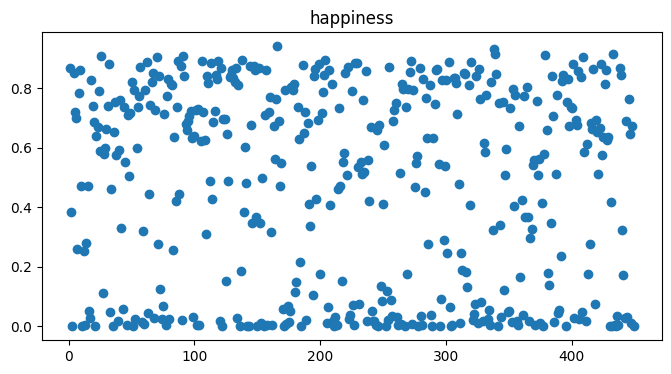

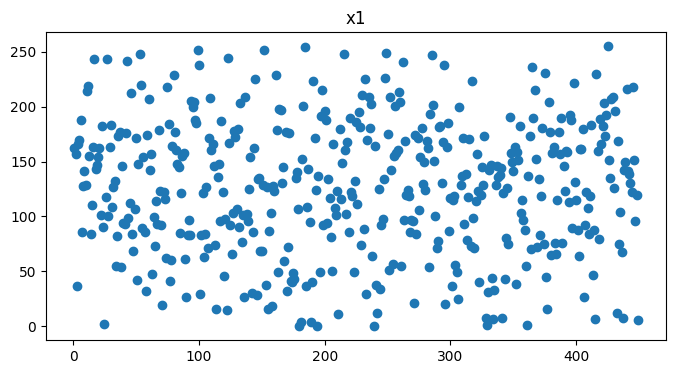

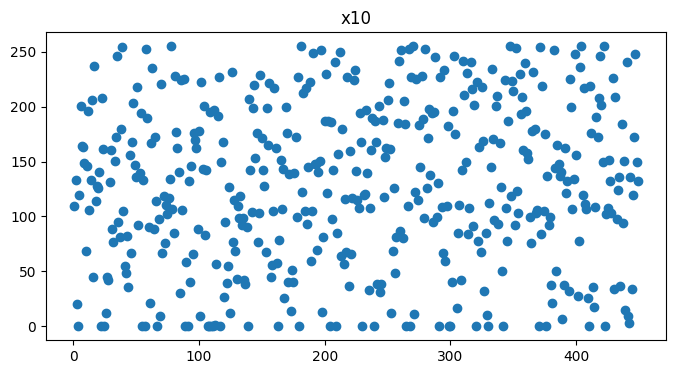

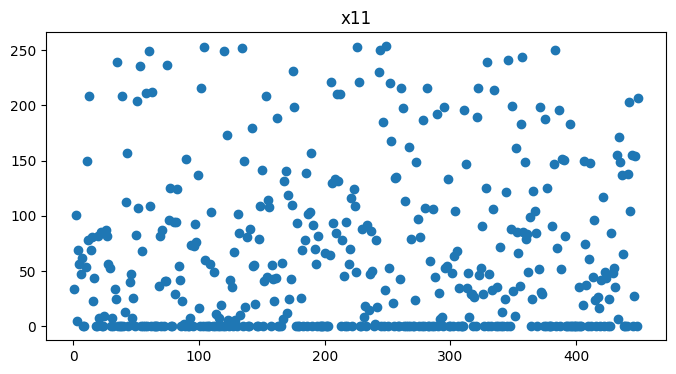

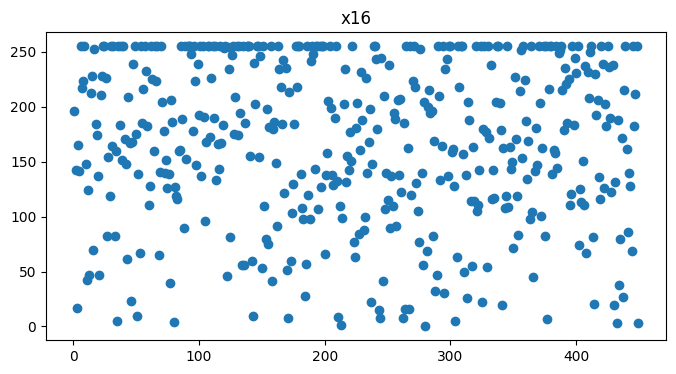

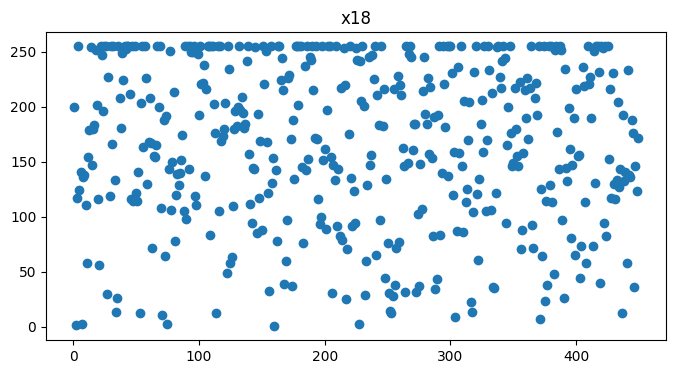

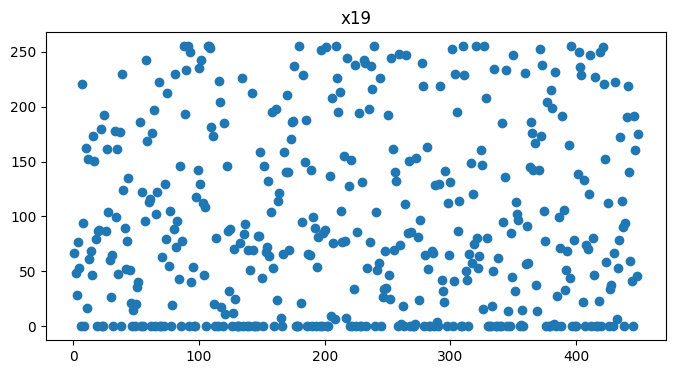

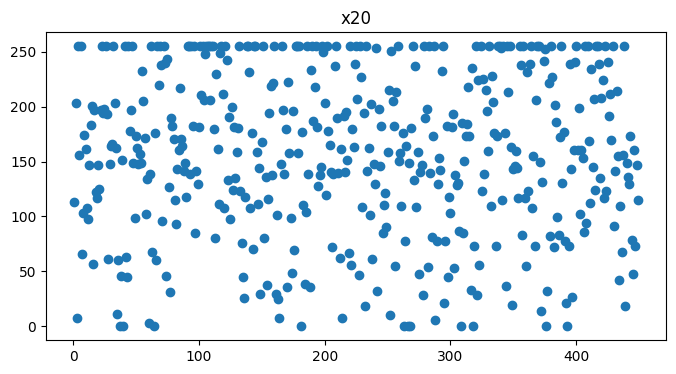

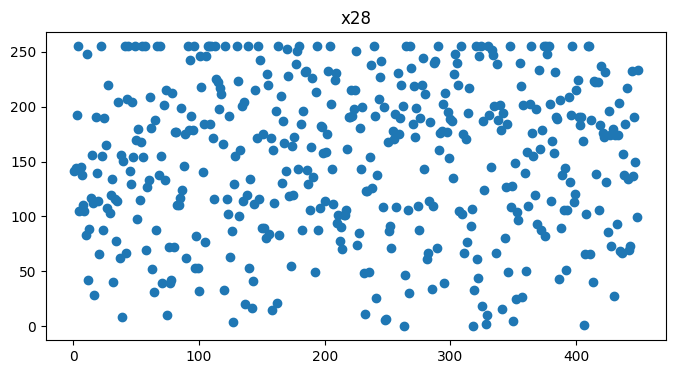

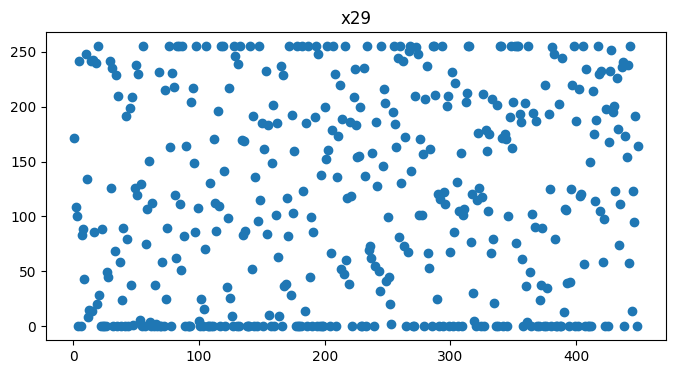

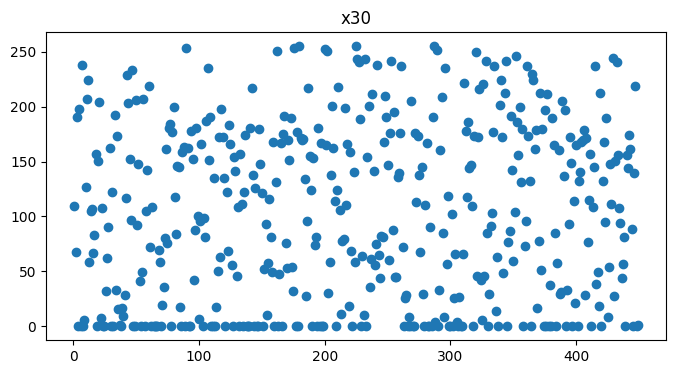

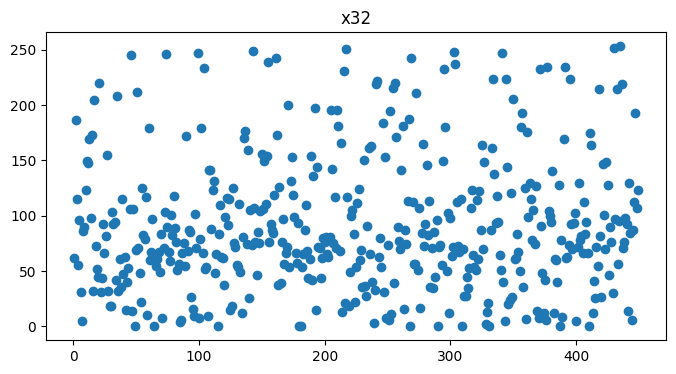

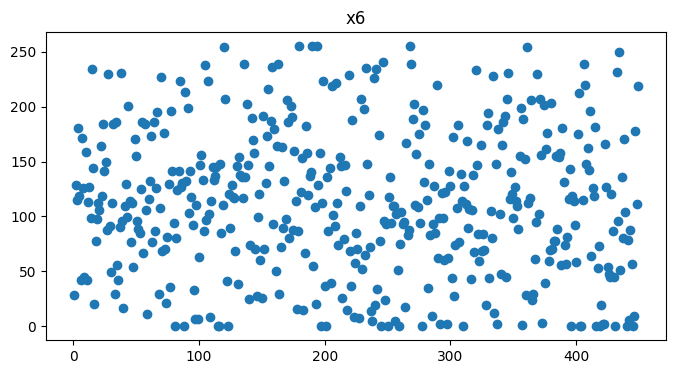

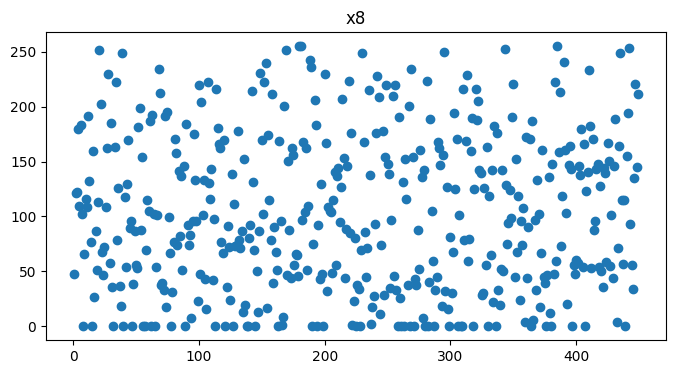

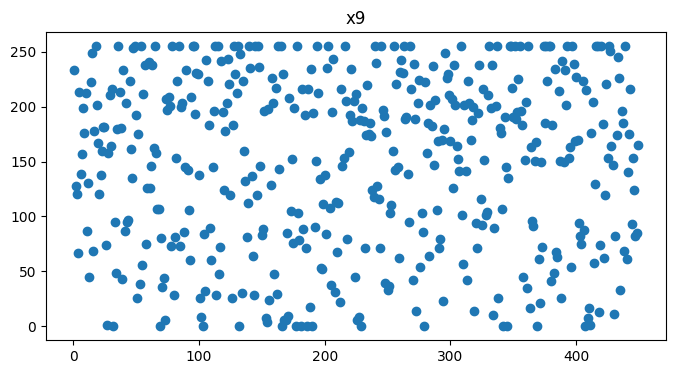

'happiness'

In [73]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def showResDistribution(my_res, title):
    
    plt.figure(figsize=(8,4))
    plt.title(title)
    x = range(1, len(my_res) + 1)
    y = my_res

    plt.scatter(x, y)
    plt.show()

def checkAxesDist(folderPath, emo):
    if os.path.exists(folderPath):
        target_emotion = emo
        ls_name = os.listdir(folderPath)
#         print(ls_name)
        result_dic = {}

        for i in ls_name:
            if 'axes_data' in i:
                mypath = os.path.join(folderPath, i)
                temp = pd.read_csv(mypath)
#                 print(temp)
#                 print(i[:-14])
                result_dic[i[:-14] + '.png'] = temp.to_dict()
                
#         sort in value order 
#         print(result_dic.items())
#         res_value_order = sorted(result_dic, key=lambda item: item[1][emo], reverse = True)

#         print('result_dic', result_dic)
        # no need to sort
        axes_analysis = {}
        for i in result_dic.values():
            axes_analysis = {k:[] for k in i.keys()}
            break
#         print(axes_analysis)
        for i in result_dic.values():
#             print(i)
            for k, v in i.items():
#                 print(k, v)
                axes_analysis[k].append(v[0])
#         print(axes_analysis.keys())
#         for _, v in res_value_order.items():
        for k, v in axes_analysis.items():
#             print(v)
            showResDistribution(v, k)
        
    

        return emo
    else:
        print("folderNameNotExists")

checkAxesDist('image_analysis/happiness/', 'happiness')